In [7]:
import pandas as pd

factories = pd.read_csv("tbl_factory.csv", index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [8]:
warehouses = pd.read_csv("tbl_warehouse.csv", index_col=0)
warehouses.head()

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부


In [9]:
cost = pd.read_csv("rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [10]:
trans = pd.read_csv("tbl_transaction.csv", index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [11]:
join_data = pd.merge(trans, cost, left_on=["ToFC", "FromWH"], right_on=["FCID", "WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [12]:
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부


In [13]:
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
join_data = join_data[["TransactionDate", "Quantity", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [14]:
north = join_data.loc[join_data["WHRegion"]=="북부"]
north

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부
...,...,...,...,...,...,...,...,...,...,...
3984,2019-12-30 12:29:42,22,0.9,FC00002,수원공장,29,WH00001,판교창고,35,북부
3987,2019-12-30 17:51:24,32,1.3,FC00003,인천공장,31,WH00002,용인창고,41,북부
3992,2019-12-31 01:50:16,33,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
3996,2019-12-31 17:10:21,35,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부


In [15]:
south = join_data.loc[join_data["WHRegion"]=="남부"]
south

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
...,...,...,...,...,...,...,...,...,...,...
3993,2019-12-31 03:35:04,20,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
3994,2019-12-31 07:05:56,11,0.8,FC00005,대구공장,21,WH00004,대전창고,60,남부
3995,2019-12-31 11:27:51,29,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
3998,2019-12-31 21:45:07,34,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부


In [16]:
print("북부지사 총비용: " + str(north["Cost"].sum()) + "만원")
print("남부지사 총비용: " + str(south["Cost"].sum()) + "만원")

북부지사 총비용: 2189.3만원
남부지사 총비용: 2062.0만원


In [17]:
print("북부지사의 총부품 운송개수: " + str(north["Quantity"].sum()) + "개")
print("남부지사의 총부품 운송개수: " + str(south["Quantity"].sum()) + "개")

북부지사의 총부품 운송개수: 49146개
남부지사의 총부품 운송개수: 50214개


In [19]:
tmp = (north["Cost"].sum() / north["Quantity"].sum()) * 10000
print("북부지사의 부품 1개당 운송 비용: " + str(int(tmp)) + "원")
tmp = (south["Cost"].sum() / south["Quantity"].sum()) * 10000
print("남부지사의 부품 1개당 운송 비용: " + str(int(tmp)) + "원")

북부지사의 부품 1개당 운송 비용: 445원
남부지사의 부품 1개당 운송 비용: 410원


In [21]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
cost_chk.head()

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,서울공장,28,북부
1,FC00001,WH00002,0.8,서울공장,28,북부
2,FC00001,WH00003,1.5,서울공장,28,북부
3,FC00002,WH00001,0.9,수원공장,29,북부
4,FC00002,WH00002,0.8,수원공장,29,북부


In [22]:
print("북부지사의 평균 운송 비용: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="북부"].mean()) + "원")
print("북부지사의 평균 운송 비용: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="남부"].mean()) + "원")

북부지사의 평균 운송 비용: 1.075원
북부지사의 평균 운송 비용: 1.05원


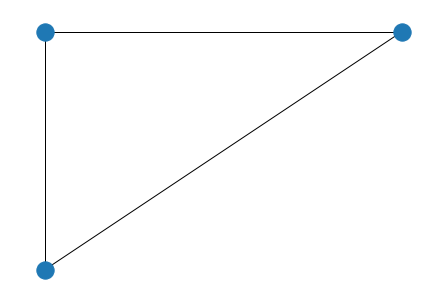

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos={}
pos["nodeA"]=(0, 0)
pos["nodeB"]=(1, 1)
pos["nodeC"]=(0, 1)

nx.draw(G,pos)

plt.show()

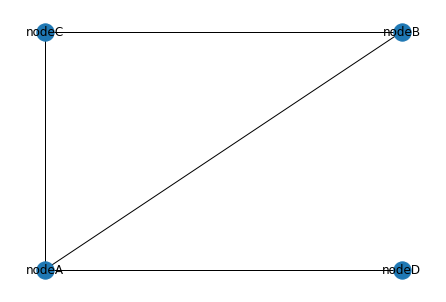

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")
G.add_edge("nodeA", "nodeD")

pos={}
pos["nodeA"]=(0, 0)
pos["nodeB"]=(1, 1)
pos["nodeC"]=(0, 1)
pos["nodeD"]=(1, 0)

nx.draw(G,pos, with_labels=True)

plt.show()

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_w = pd.read_csv('network_weight.csv')
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [29]:
df_p = pd.read_csv('network_pos.csv')
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


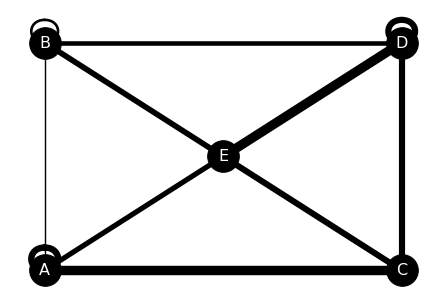

In [31]:
size = 10
edge_weights = []
for i in range(len(df_w)):
  for j in range(len(df_w.columns)):
    edge_weights.append(df_w.iloc[i][j]*size)

G = nx.Graph()

for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    G.add_edge(df_w.columns[i], df_w.columns[j])

pos = {}
for i in range(len(df_w.columns)):
  node = df_w.columns[i]
  pos[node] = (df_p[node][0], df_p[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

In [32]:
import pandas as pd
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [33]:
import pandas as pd  
import matplotlib.pyplot as plt
import networkx as nx 

df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [35]:
df_pos = pd.read_csv('trans_route_pos.csv')
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


In [41]:
print(df_tr.columns)

Index(['F1', 'F2', 'F3', 'F4'], dtype='object')


In [42]:
df_tr.index

Index(['W1', 'W2', 'W3'], dtype='object', name='공장')

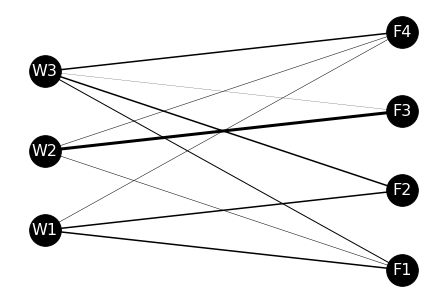

In [40]:
G = nx.Graph()

for i in range(len(df_pos.columns)):
  G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
  for j in range(len(df_pos.columns)):
    if not (i==j):
      G.add_edge(df_pos.columns[i],df_pos.columns[j])
      if num_pre < len(G.edges):
        num_pre = len(G.edges)
        weight = 0
        if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
          if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
            weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
        elif(df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
            weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
        edge_weights.append(weight)
                

pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])
    
nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

In [44]:
import pandas as pd

df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tc = pd.read_csv('trans_cost.csv', index_col="공장")

df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [45]:
df_tc

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [46]:
def trans_cost(df_tr, df_tc):
  cost = 0
  for i in range(len(df_tc.index)):
    for j in range(len(df_tr.columns)):
      cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]
  return cost

print("총 운송 비용:" + str(trans_cost(df_tr, df_tc)))

총 운송 비용:1493


In [48]:
import pandas as pd

df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [52]:
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [51]:
df_demand.columns[0]

'F1'

In [50]:
for i in range(len(df_demand.columns)):
  temp_sum = sum(df_tr[df_demand.columns[i]])
  print(str(df_demand.columns[i] + "으로 운송량: " + str(temp_sum) + " (수요량:" + str(df_demand.iloc[0][i]) + ")"))
  if temp_sum >= df_demand.iloc[0][i]:
    print("수요량을 만족시키고 있음")
  else:
    print("수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요")

F1으로 운송량: 30 (수요량:28)
수요량을 만족시키고 있음
F2으로 운송량: 30 (수요량:29)
수요량을 만족시키고 있음
F3으로 운송량: 32 (수요량:31)
수요량을 만족시키고 있음
F4으로 운송량: 25 (수요량:25)
수요량을 만족시키고 있음


In [55]:
df_supply

,W1,W2,W3
0,35,41,42


In [54]:
for i in range(len(df_supply.columns)):
  temp_sum = sum(df_tr.loc[df_supply.columns[i]])
  print(str(df_supply.columns[i]) + " 부터의 운송량: " + str(temp_sum) + " (공급한계: " + str(df_supply.iloc[0][i]) + ")")
  if temp_sum <= df_supply.iloc[0][i]:
    print("공급한계 범위내")
  else:
    print("공급한계 초과. 운송경로 재계산 필요")

W1 부터의 운송량: 35 (공급한계: 35)
공급한계 범위내
W2 부터의 운송량: 40 (공급한계: 41)
공급한계 범위내
W3 부터의 운송량: 42 (공급한계: 42)
공급한계 범위내


In [56]:
import pandas as pd
import numpy as np

df_tr_new = pd.read_csv('trans_route_new.csv', index_col="공장")
print(df_tr_new)

    F1  F2  F3  F4
공장                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15


In [57]:
print("총 운송 비용(변경 후) :" + str(trans_cost(df_tr_new, df_tc)))

총 운송 비용(변경 후) :1428


In [58]:
def condition_demand(df_tr, df_demand):
  flag = np.zeros(len(df_demand.columns))
  for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    if (temp_sum>=df_demand.iloc[0][i]):
      flag[i] = 1
  return flag

In [60]:
def condition_supply(df_tr, df_supply):
  flag = np.zeros(len(df_supply.columns))
  for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    if temp_sum <= df_supply.iloc[0][i]:
      flag[i] = 1
  return flag

print("수요조건 계산결과: " + str(condition_demand(df_tr_new, df_demand)))
print("공급조건 계산결과: " + str(condition_supply(df_tr_new, df_supply)))

수요조건 계산결과: [1. 1. 1. 1.]
공급조건 계산결과: [1. 0. 1.]
